In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

# Extract data from CSV

In [2]:
hdata = pd.read_csv('owid-covid-data.csv', parse_dates = [3,4])
hdata.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
print("Data type : ", type(hdata))
print("Data dims : ", hdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (178102, 67)


In [4]:
hdata.isna().sum()

iso_code                                        0
continent                                   10437
location                                        0
date                                            0
total_cases                                  6373
                                            ...  
human_development_index                     34680
excess_mortality_cumulative_absolute       172024
excess_mortality_cumulative                172024
excess_mortality                           172024
excess_mortality_cumulative_per_million    172024
Length: 67, dtype: int64

In [5]:
print("Number of countries :", len(hdata["location"].unique()))
hdata.location.unique()

Number of countries : 242


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [6]:
hdata['total_cases'] = hdata.total_cases .astype(float)


print(f"Total Cases: {hdata.total_cases.sum():,.2f}")
print(f"Total Covid deaths: {hdata.total_deaths.sum():,.2f}")
print(f"Percentage of Cases over total deaths: {(hdata.total_deaths.sum()/hdata.total_cases.sum()*100):,.2f}%")

Total Cases: 488,993,774,833.00
Total Covid deaths: 9,321,885,642.00
Percentage of Cases over total deaths: 1.91%


# Graph to show how the number of deaths increases with time

['Afghanistan' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Bhutan'
 'Brunei' 'Cambodia' 'China' 'Georgia' 'Hong Kong' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Israel' 'Japan' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Kyrgyzstan' 'Laos' 'Lebanon' 'Macao' 'Malaysia' 'Maldives' 'Mongolia'
 'Myanmar' 'Nepal' 'Northern Cyprus' 'Oman' 'Pakistan' 'Palestine'
 'Philippines' 'Qatar' 'Saudi Arabia' 'Singapore' 'South Korea'
 'Sri Lanka' 'Syria' 'Taiwan' 'Tajikistan' 'Thailand' 'Timor' 'Turkey'
 'Turkmenistan' 'United Arab Emirates' 'Uzbekistan' 'Vietnam' 'Yemen']


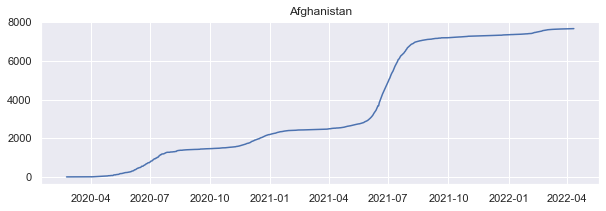

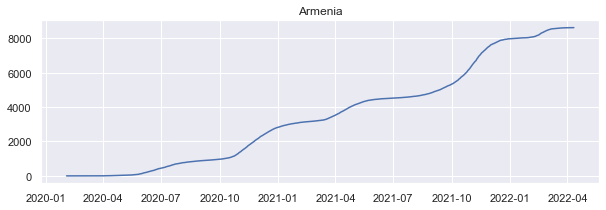

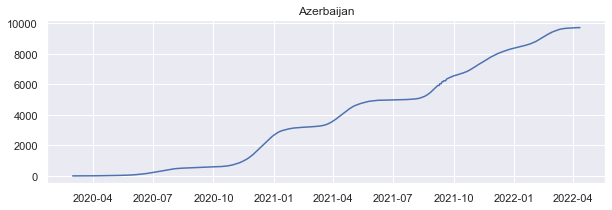

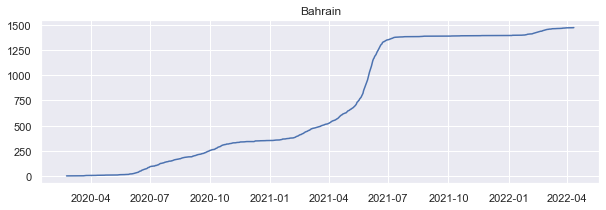

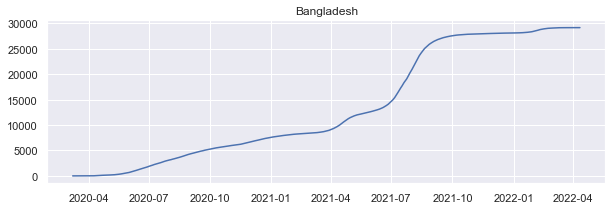

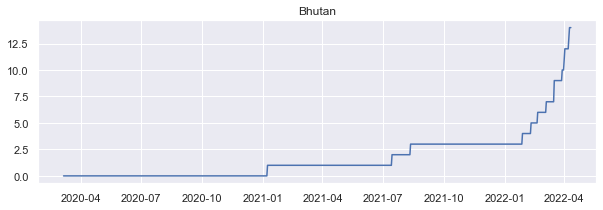

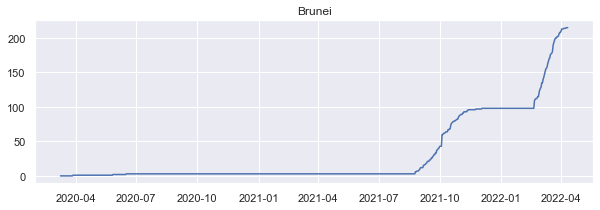

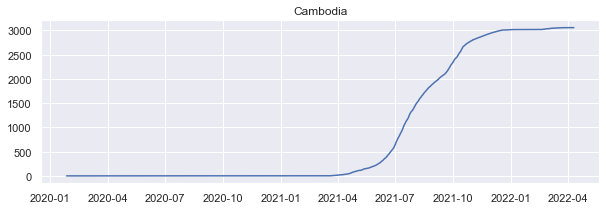

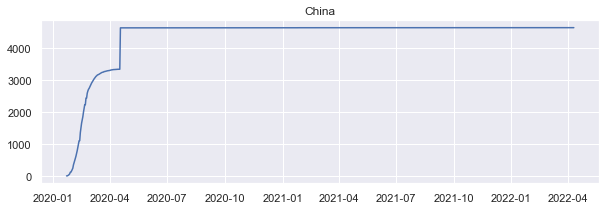

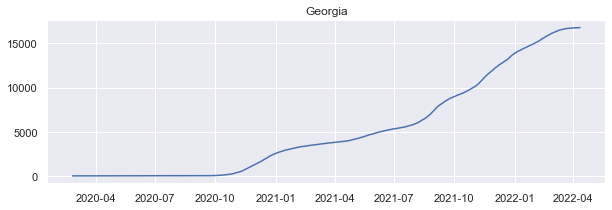

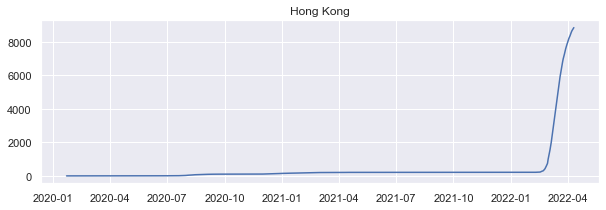

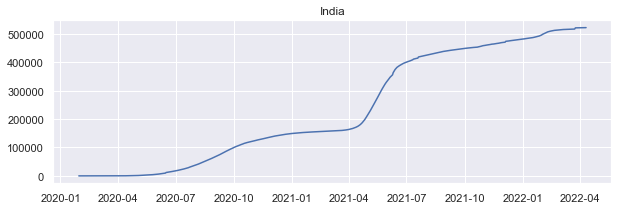

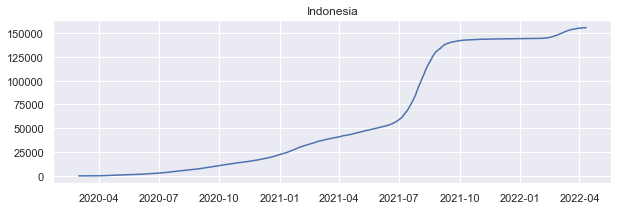

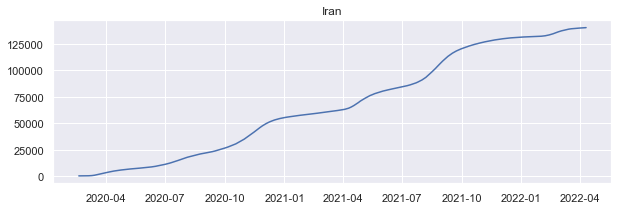

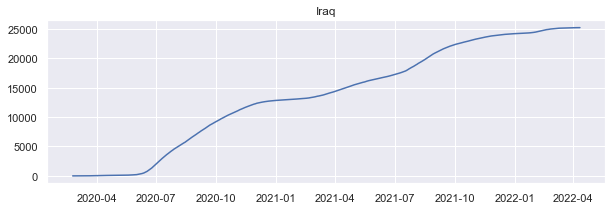

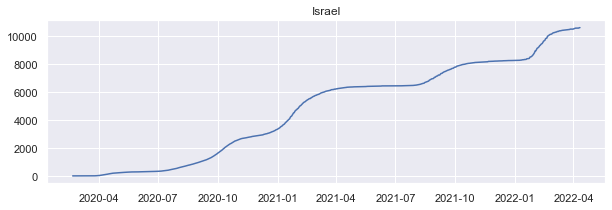

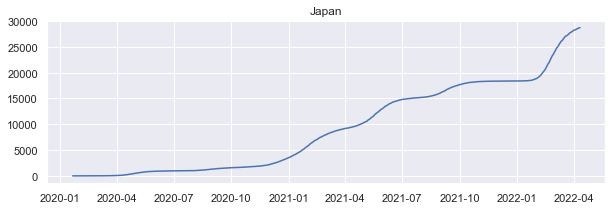

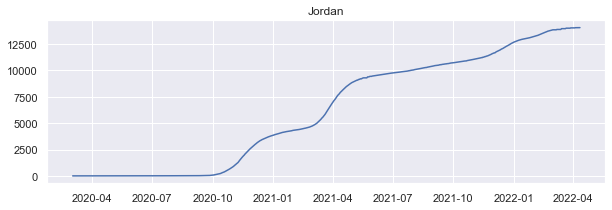

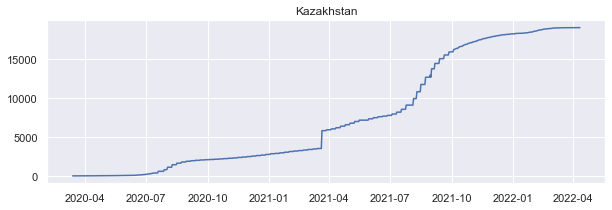

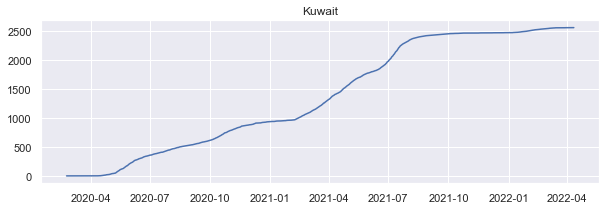

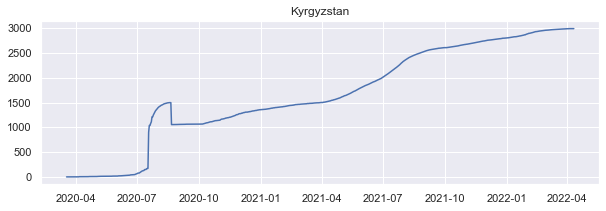

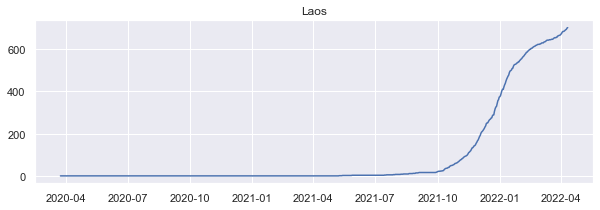

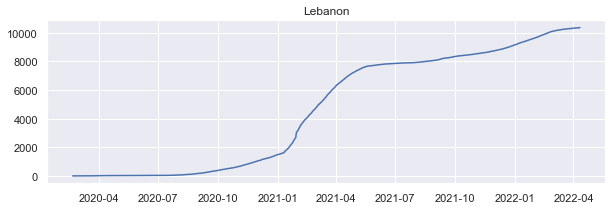

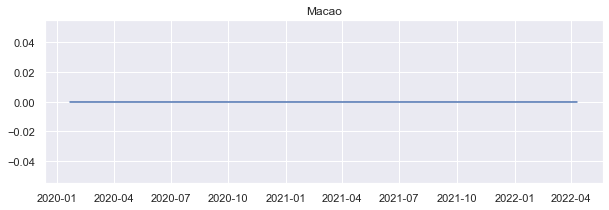

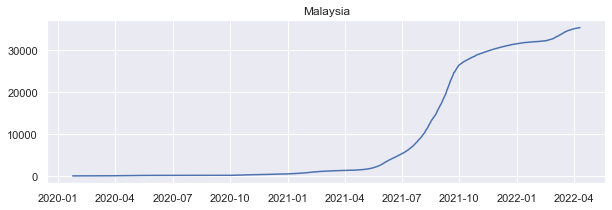

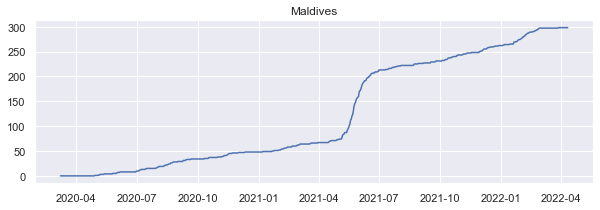

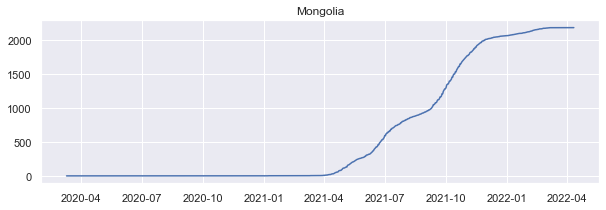

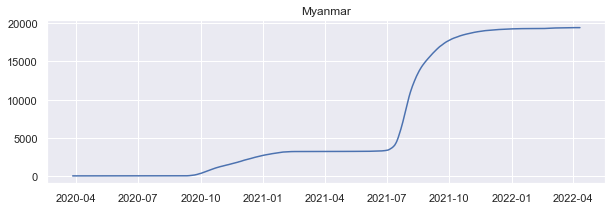

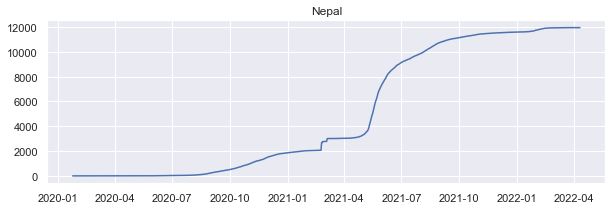

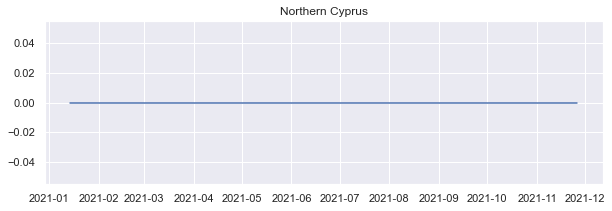

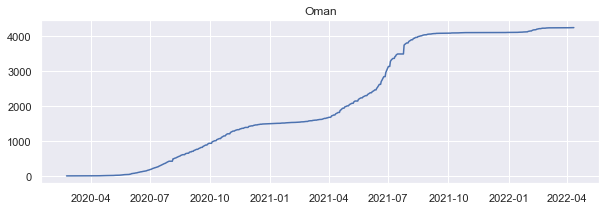

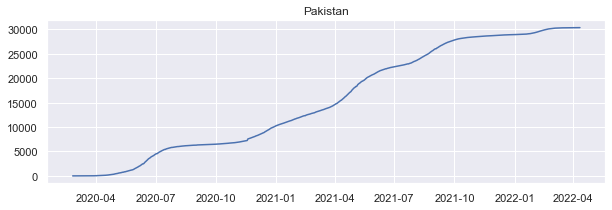

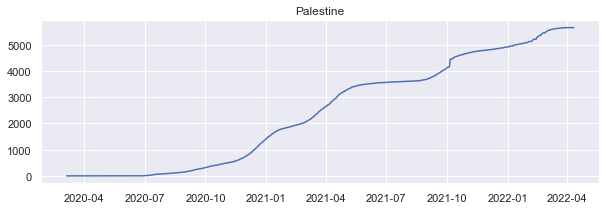

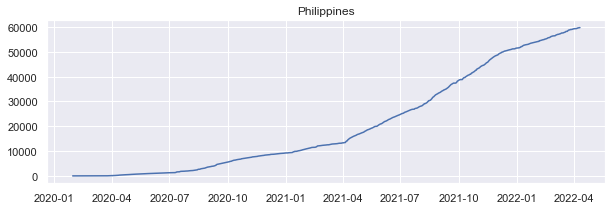

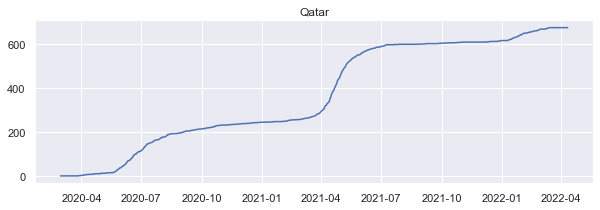

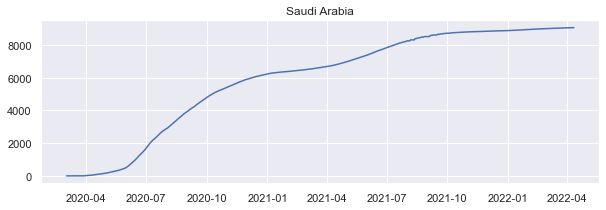

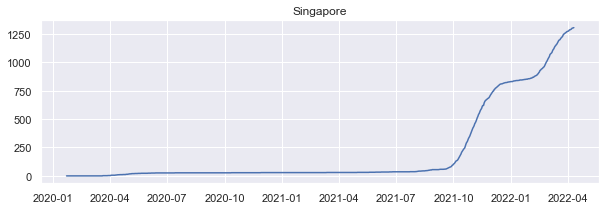

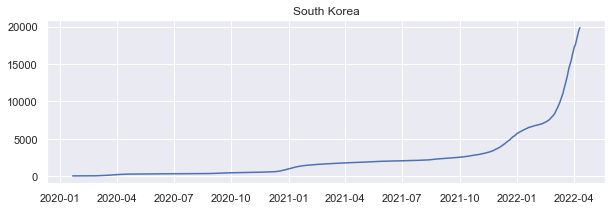

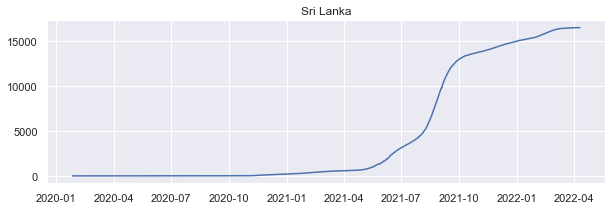

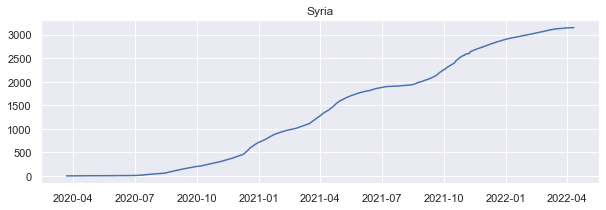

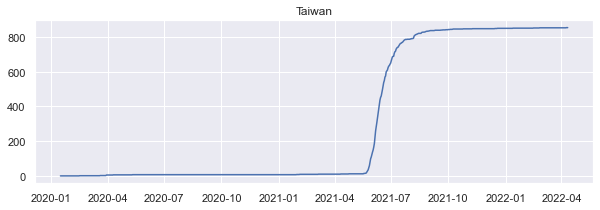

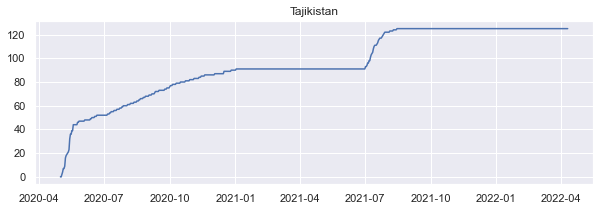

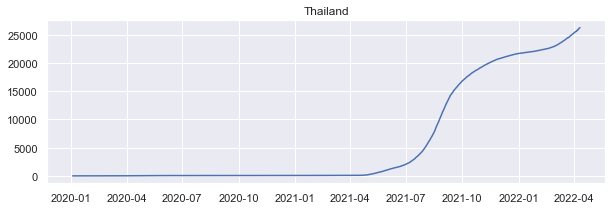

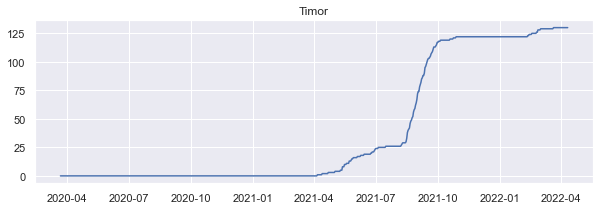

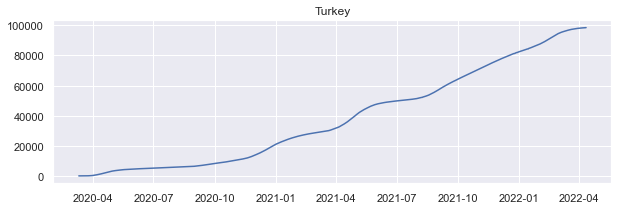

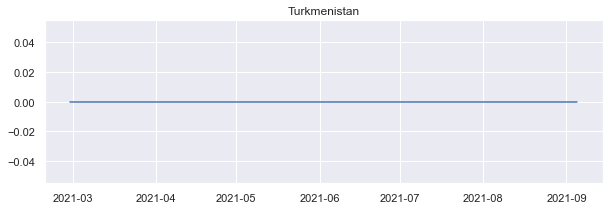

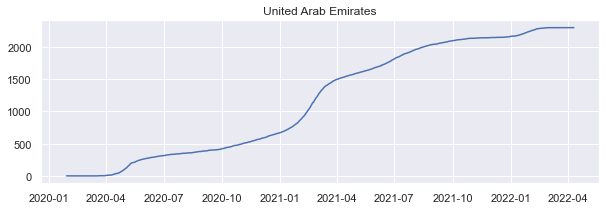

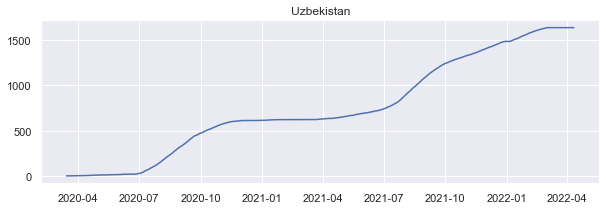

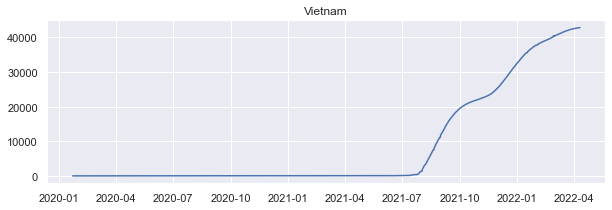

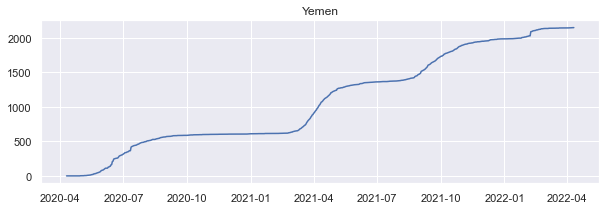

In [7]:
asia_data = pd.DataFrame(hdata[hdata["continent"] == 'Asia'])
#print("Number of countries :", len(asia_data["location"].unique()))
#print(asia_data["location"].value_counts())
deaths = asia_data.groupby(['location','date']).agg({'total_deaths':'sum','total_cases':'sum','new_deaths':'sum','new_cases':'sum','total_vaccinations':'sum','people_fully_vaccinated':'sum','excess_mortality_cumulative':'sum'}).reset_index()
deaths
#sb.catplot(y = "location", data = asia_data, kind = "count", height = 8)
#['total_deaths','new_cases','total_tests','total_vaccinations','people_fully_vaccinated','excess_mortality_cumulative']
countries = deaths['location'].unique()
print(countries)
for i in countries:
    var = deaths[deaths['location'] == i]
    total_deaths1= pd.DataFrame(var['total_deaths'])
    date = pd.DataFrame(var['date'])
    plt.figure(figsize=(10,3))
    plt.plot(date, total_deaths1)
    plt.title(i)
    plt.show()


# Heatmap to show correlation between variables

<AxesSubplot:>

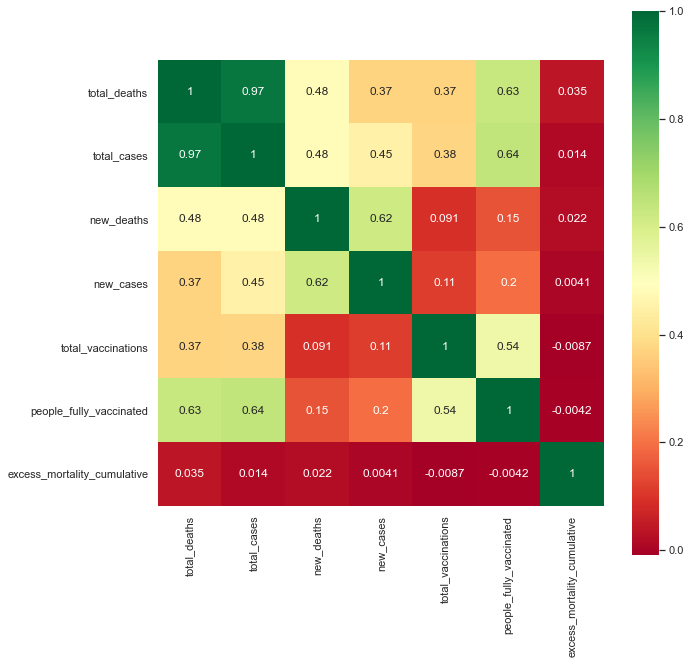

In [8]:
plt.figure(figsize = (10,10))

sb.heatmap(deaths.corr(),square=True, cmap='RdYlGn', annot=True)

### as shown from the heatmap, the total number of cases has the highest correlation to the total number of deathd

# Extract total_deaths, new_cases, new_deaths and add them into a new data frame

In [9]:

numeric_data = pd.DataFrame(hdata[["total_deaths", "new_cases", "new_deaths"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

#f, axes = plt.subplots(6, 3, figsize=(18, 24))

#count = 0
#for var in numeric_data:
    #sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    #sb.histplot(data = numeric_data[var], ax = axes[count,1])
    #sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    #count += 1

,total_deaths,new_cases,new_deaths
count,153596.00,171542.00,153602.00
mean,60690.94,12396.35,166.82
std,317410.25,88686.41,816.55
min,1.00,0.00,0.00
25%,85.00,1.00,0.00
50%,834.00,78.00,2.00
75%,7832.00,1075.00,19.00
max,6181737.00,4089026.00,18144.00


# creating new dataframe to store desired result which is "feature_df" 

In [10]:


np.random.seed(0)  

df = pd.read_csv('owid-covid-data.csv')
df.fillna(0,inplace = True)
df.drop(['date'],axis = 1,inplace=True)
df = pd.DataFrame(df[df["continent"] == 'Asia'])
df = df.set_index(['location'],drop = False)## set the location as the index of the dataframe so that it wouldnt be dropped 
df = df._get_numeric_data()
##drop non numermic features
df = df[(df >= 0).all(1)]   ## remove all negative entries

## Since we want to predict the new covid death tomorrow, we will have to shift the new_death columns down by 1 for each country
feature_df= pd.DataFrame()
for _,frame in df.groupby(['location']):
    target_frame = frame['new_deaths']
    target_frame = target_frame[1:]
    frame = frame.drop(columns=['new_deaths'])
    frame = frame[:-1]
    new_frame = pd.concat([target_frame,frame],axis=1)
    feature_df = pd.concat([feature_df,new_frame],axis=0)

feature_df = feature_df.rename(columns={"new_deaths": "new_deaths_tomorrow"}) ## renaming the target column
 


# The date frame we want to use

In [11]:
feature_df

,new_deaths_tomorrow,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,5.0,5.0,0.000,0.0,0.000,0.126,0.126,0.000,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
Afghanistan,0.0,5.0,0.0,0.000,0.0,0.000,0.126,0.000,0.000,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
Afghanistan,0.0,5.0,0.0,0.000,0.0,0.000,0.126,0.000,0.000,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
Afghanistan,0.0,5.0,0.0,0.000,0.0,0.000,0.126,0.000,0.000,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
Afghanistan,0.0,5.0,0.0,0.000,0.0,0.000,0.126,0.000,0.000,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,1.0,11812.0,0.0,1.000,2144.0,0.143,387.398,0.000,0.033,70.317,...,7.6,29.2,49.542,0.7,66.12,0.470,0.0,0.0,0.0,0.0
Yemen,1.0,11812.0,0.0,0.857,2145.0,0.286,387.398,0.000,0.028,70.349,...,7.6,29.2,49.542,0.7,66.12,0.470,0.0,0.0,0.0,0.0
Yemen,1.0,11812.0,0.0,0.857,2146.0,0.429,387.398,0.000,0.028,70.382,...,7.6,29.2,49.542,0.7,66.12,0.470,0.0,0.0,0.0,0.0


In [12]:
feature_df.describe()

,new_deaths_tomorrow,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,37557.000000,3.755700e+04,37557.000000,37557.000000,37557.000000,37557.000000,37557.000000,37557.000000,37557.000000,37557.000000,...,37557.000000,37557.000000,37557.000000,37557.000000,37557.00000,37557.000000,37557.000000,37557.000000,37557.000000,37557.000000
mean,37.479964,8.805679e+05,3810.148228,3780.254502,12255.470059,37.327879,26292.884237,130.952671,130.217405,241.444644,...,3.737239,31.036347,36.888936,2.576644,74.18873,0.702882,438.772149,0.192680,0.356601,12.728875
std,175.160437,3.599153e+06,19834.084513,19355.099001,47206.491665,168.696141,49813.071681,522.683975,479.565658,435.039214,...,5.008235,19.952425,38.690961,2.715171,8.47071,0.197933,8082.094621,2.142753,4.527150,174.415569
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.663000e+03,12.000000,17.714000,35.000000,0.000000,259.793000,0.601000,1.031000,3.210000,...,0.300000,20.600000,0.000000,0.800000,71.10000,0.632000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,9.627900e+04,236.000000,261.000000,1170.000000,2.571000,4523.952000,12.737000,14.489000,58.607000,...,1.900000,35.400000,28.178000,1.700000,75.09000,0.737000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,4.661250e+05,1527.000000,1552.429000,6535.000000,17.286000,28649.034000,88.155000,90.441000,295.594000,...,5.800000,42.500000,78.463000,2.990000,77.69000,0.813000,0.000000,0.000000,0.000000,0.000000
max,4529.000000,4.303613e+07,621317.000000,404997.571000,521691.000000,4190.000000,430293.402000,26186.094000,10968.157000,4214.059000,...,26.900000,78.100000,100.000000,13.050000,84.86000,0.949000,261045.600000,47.360000,202.070000,6816.080708


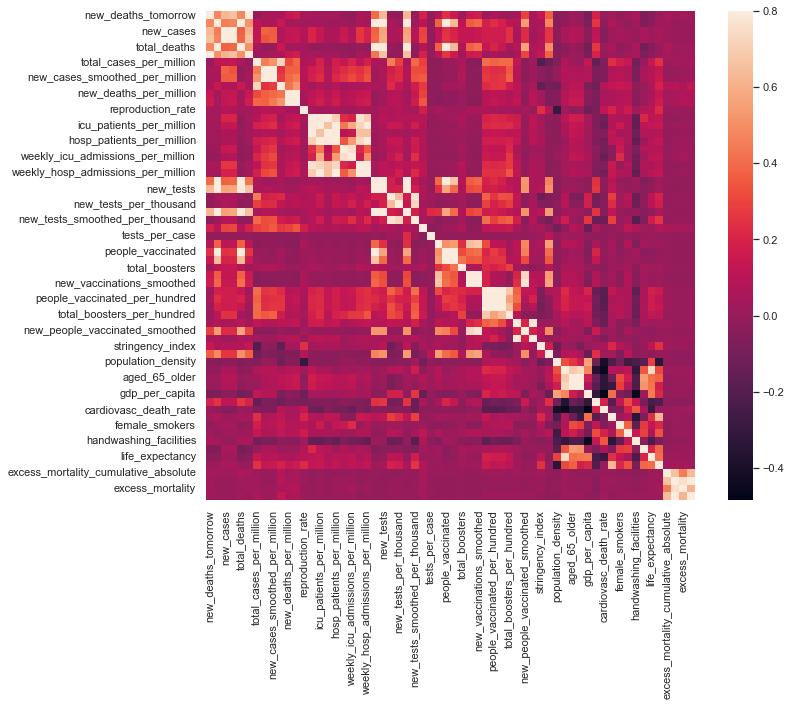

In [13]:
corrmat = feature_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

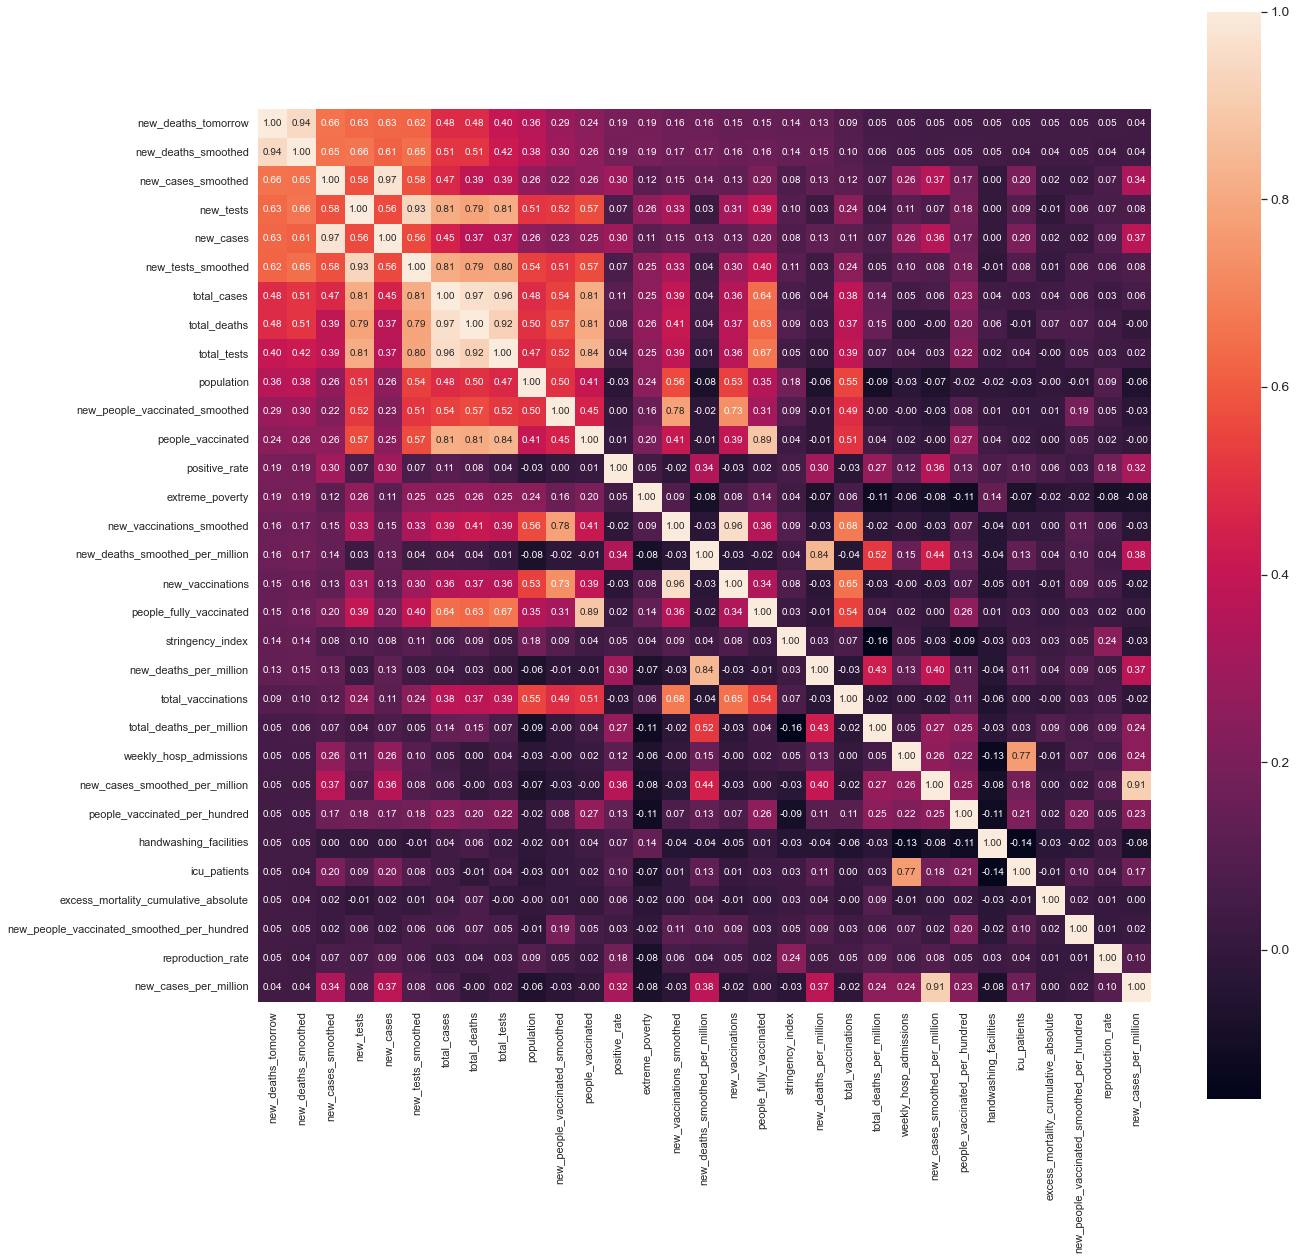

In [14]:
k = 31 #number of variables for heatmap
cols = corrmat.nlargest(k, 'new_deaths_tomorrow')['new_deaths_tomorrow'].index
fig, ax = plt.subplots(figsize=(20,20))  
cm = np.corrcoef(feature_df[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# checking the type of the data

In [15]:
y = pd.DataFrame(feature_df['new_deaths_tomorrow'])

x = pd.DataFrame(feature_df[['total_deaths','total_cases','total_tests','new_cases','new_tests','total_vaccinations']])
print(x.dtypes)


total_deaths          float64
total_cases           float64
total_tests           float64
new_cases             float64
new_tests             float64
total_vaccinations    float64
dtype: object


# split up data randomly to predict the data using multi linear regression

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# Check the sample sizes
print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (26289, 6) (26289, 1)
Test Set  : (11268, 6) (11268, 1)


In [17]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [18]:

print("Intercept: ", mlr.intercept_)
print('Coefficients \t: a = ', mlr.coef_)
list(zip(x, mlr.coef_))

Intercept:  [0.46833798]
Coefficients 	: a =  [[ 2.08985390e-03 -3.52895811e-06 -1.94915541e-06  3.20964758e-03
   5.98919461e-04 -1.78321041e-08]]


[('total_deaths',
  array([ 2.08985390e-03, -3.52895811e-06, -1.94915541e-06,  3.20964758e-03,
          5.98919461e-04, -1.78321041e-08]))]

In [19]:
from sklearn.metrics import r2_score
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))
Accuracy=r2_score(y_test,y_pred_mlr)*100
print(" Accuracy of the model is %.2f" %Accuracy)

Prediction for test set: [[ 4.38464932]
 [ 6.42924655]
 [ 0.71454171]
 ...
 [ 0.66783765]
 [16.38615092]
 [48.87533153]]
 Accuracy of the model is 46.26


### 46.46% for the accuracy is actully pretty low. This shows that we cannot precisely predict the number of deaths which is going to occur tomorrow. 

In [20]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 56.45
Mean Absolute Error: 28.607028761012913
Mean Square Error: 14933.446137286403
Root Mean Square Error: 122.20248007829629


# Visual data representation

Text(0, 0.5, 'Predict')

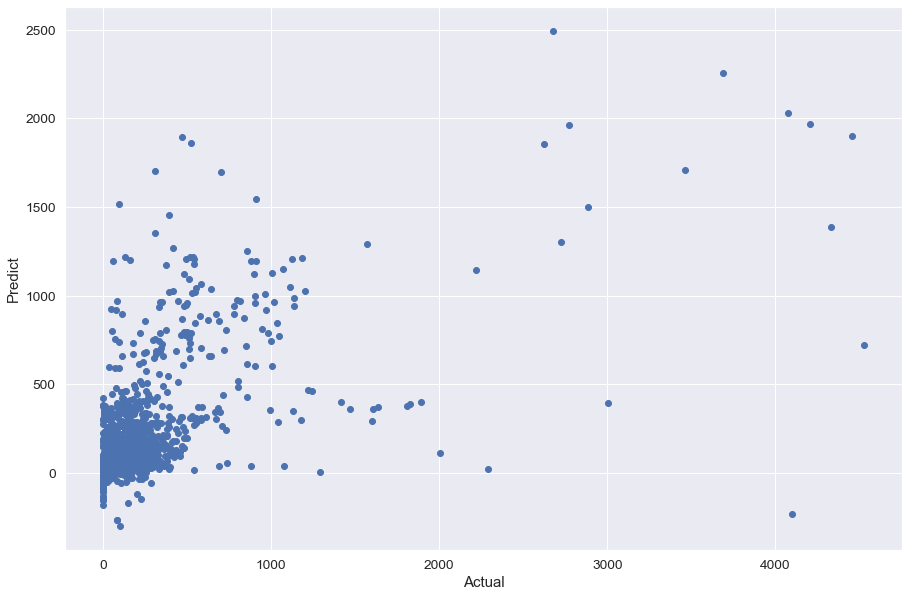

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predict')

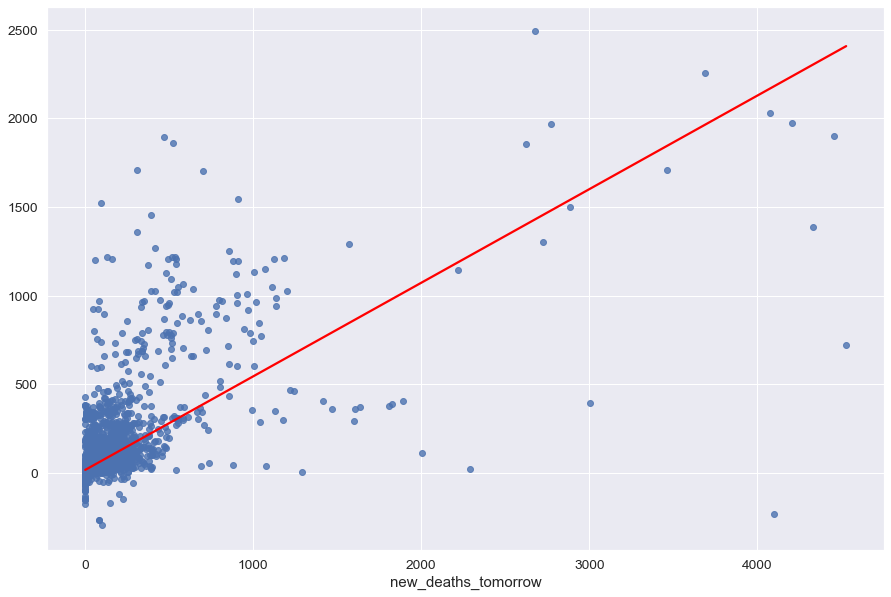

In [22]:
plt.figure(figsize=(15,10))
sb.regplot(x=y_test,y=y_pred_mlr,ci=None, line_kws={"color": "red"});